In [ ]:
# Read the file 'maillard_r.csv' from Google Drive

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
df = pd.read_csv('/content/drive/My Drive/Data/maillard_r.csv')
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
    Country   RedMeat   WhiteMeat   Eggs   Milk   Fish   Cereals   Starch  \
0   Albania      10.1         1.4    0.5    8.9    0.2      42.3      0.6   
1   Austria       8.9        14.0    4.3   19.9    2.1      28.0      3.6   
2   Belgium      13.5         9.3    4.1   17.5    4.5      26.6      5.7   
3  Bulgaria       7.8         6.0    1.6    8.3    1.2      56.7      1.1   
4   Croatia       4.4         5.0    1.2    9.5    0.6      55.9      3.0   

    Nuts  Fruits&Veggies  
0    5.5             1.7  
1    1.3             4.3  
2    2.1             4.0  
3    3.7             4.2  
4    5.7             3.2  


In [ ]:
# Keep all numeric columns (alternatively, you could just remove Country)

df_numeric = df.select_dtypes(include=['number'])
print(df_numeric.head())

    RedMeat   WhiteMeat   Eggs   Milk   Fish   Cereals   Starch   Nuts  \
0      10.1         1.4    0.5    8.9    0.2      42.3      0.6    5.5   
1       8.9        14.0    4.3   19.9    2.1      28.0      3.6    1.3   
2      13.5         9.3    4.1   17.5    4.5      26.6      5.7    2.1   
3       7.8         6.0    1.6    8.3    1.2      56.7      1.1    3.7   
4       4.4         5.0    1.2    9.5    0.6      55.9      3.0    5.7   

   Fruits&Veggies  
0             1.7  
1             4.3  
2             4.0  
3             4.2  
4             3.2  


In [8]:
# Principal components analysis

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Scale the data
x = StandardScaler().fit_transform(df_numeric)

# Apply PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)

# Create a new dataframe with the principal components
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
print(principalDf.head())

   principal component 1  principal component 2
0               3.485646              -1.553719
1              -1.475779              -1.094634
2              -1.694426               0.149936
3               3.147354              -1.310276
4               3.648927              -1.047766


In [9]:
# What percentage of variation is explained by the Principal Components

# Explained variance
print(pca.explained_variance_ratio_)


[0.45418781 0.1830398 ]


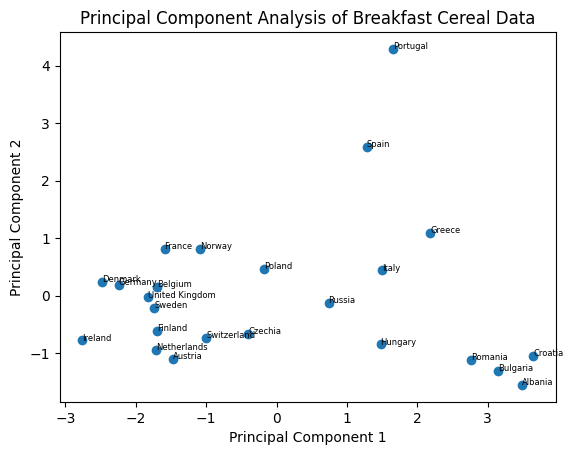

In [11]:
# Display the principal component in a scatter plot

import matplotlib.pyplot as plt

# Scatter plot of the principal components
plt.scatter(principalDf['principal component 1'], principalDf['principal component 2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Principal Component Analysis of Breakfast Cereal Data')
# Add labels to the points
for i, txt in enumerate(df['Country']):
    plt.annotate(txt, (principalDf['principal component 1'][i], principalDf['principal component 2'][i]),fontsize=6)

plt.show()